In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [101]:
df = pd.read_csv("data/medical_insurance_scaled.csv", sep=",")
df.head()

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,-1.440016,-1.010535,-0.453197,-0.909856,1.973265,-0.565825,-0.565825,-0.610797,1.763737,16884.92400
1,-1.511283,0.989575,0.509049,-0.080117,-0.506774,-0.565825,-0.565825,1.637205,-0.566978,1725.55230
2,-0.798610,0.989575,0.382826,1.579361,-0.506774,-0.565825,-0.565825,1.637205,-0.566978,4449.46200
3,-0.442273,0.989575,-1.304793,-0.909856,-0.506774,-0.565825,1.767330,-0.610797,-0.566978,21984.47061
4,-0.513541,0.989575,-0.292550,-0.909856,-0.506774,-0.565825,1.767330,-0.610797,-0.566978,3866.85520


In [102]:
df.charges.describe()

count     1335.000000
mean     13275.682489
std      12107.717986
min       1121.873900
25%       4746.698450
50%       9386.161300
75%      16622.107580
max      63770.428010
Name: charges, dtype: float64

In [103]:
# On tente de target (charges) par tranche de 5000 jusqu'à 100000 en les label encodant 
df['charges'] = pd.cut(df['charges'], bins=range(0, 100000, 5000), right=False)
le = LabelEncoder()
df['charges'] = le.fit_transform(df['charges'])

In [104]:
from sklearn.cluster import KMeans
# On fait de la cross validation
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1) 
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# On cherche le nombre de clusters optimal
wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    y_kmeans = kmeans.predict(X_test)
    print(f"Accuracy for {i} clusters: {sum(y_kmeans == y_test) / len(y_test)}")

c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 1 clusters: 0.2696629213483146


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 2 clusters: 0.2846441947565543


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 3 clusters: 0.18352059925093633


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 4 clusters: 0.18352059925093633


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 5 clusters: 0.1760299625468165


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 6 clusters: 0.20224719101123595


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 7 clusters: 0.10112359550561797


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 8 clusters: 0.14232209737827714


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 9 clusters: 0.07116104868913857


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 10 clusters: 0.09737827715355805


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 11 clusters: 0.1348314606741573


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 12 clusters: 0.12734082397003746


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 13 clusters: 0.056179775280898875


c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Accuracy for 14 clusters: 0.0599250936329588


ValueError: x and y must have same first dimension, but have shapes (10,) and (14,)

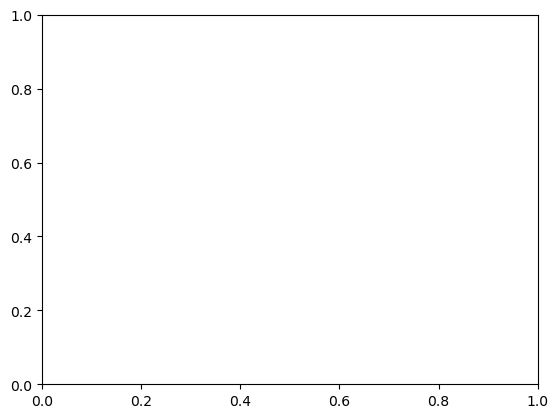

In [105]:
# Graphique des inertias
plt.plot(range(1, 11), wcss)
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

In [ ]:
# On choisit 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

c:\Users\sacha\anaconda3\envs\SY09\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
